# ML Life Cycle: Evaluation and Deployment

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve


## Part 1. Build DataFrame and Define ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the data set ``airbnbData_train``. This data set already has all the necessary preprocessing steps implemented, including one-hot encoding of the categorical variables, scaling of all numerical variable values, and imputing missing values. It is ready for modeling.

In [2]:
filename = os.path.join(os.getcwd(), "..", "data", "airbnbData_train.csv")
df = pd.read_csv(filename)

#### Define the Label

Our goal is to train a machine learning model that predicts whether an Airbnb host is a 'super host'. This is an example of supervised learning and is a binary classification problem. In our dataset, our label will be the `host_is_superhost` column and the label will either contain the value `True` or `False`.

#### Identify Features

Our features will be all of the remaining columns in the dataset.

## Part 2. Create Labeled Examples from the Data Set 

In [3]:
X = df.drop(columns="host_is_superhost")
y = df["host_is_superhost"]

## Part 3. Create Training and Test Data Sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1234)

## Part 4. Train, Test and Evaluate a Logistic Regression Model With Default Hyperparameter Values


In [5]:
model_default = LogisticRegression(max_iter=1000)
model_default.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [6]:
# 1. Make predictions on the test data using the predict_proba() method
proba_predictions_default = model_default.predict_proba(X_test)[:,1]

# 2. Make predictions on the test data using the predict() method
class_label_predictions_default = model_default.predict(X_test)

In [7]:
print("Confusion matrix for the model: ")

c_m = confusion_matrix(y_test, class_label_predictions_default, labels=[True, False])

# Create a Pandas DataFrame out of the confusion matrix for display purposes
pd.DataFrame(
c_m,
columns=['Predicted: Positive', 'Predicted: Negative'],
index=['Actual: Positive', 'Actual: Negative']
)

Confusion matrix for the model: 


,Predicted: Positive,Predicted: Negative
Actual: Positive,265,450
Actual: Negative,91,1997


## Part 5. Perform Logistic Regression Model Selection Using `GridSearchSV()`

Our goal is to find the optimal choice of hyperparameter $C$. We will then fit a logistic regression model to the training data using this value of $C$. 

In [8]:

param_grid = {"C": [10**i for i in range(-5,5)]}
param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

### Perform Grid Search Cross-Validation

In [9]:
print('Running Grid Search...')

# 1. Create a LogisticRegression model object with the argument max_iter=1000. 
#    Save the model object to the variable 'model'
model = LogisticRegression(max_iter=1000)

# 2. Run a grid search with 5-fold cross-validation and assign the output to the 
# object 'grid'.
grid = GridSearchCV(model, param_grid, cv=5)

# 3. Fit the model on the training data and assign the fitted model to the 
#    variable 'grid_search'
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [10]:
best_C = grid_search.best_params_
best_C

{'C': 1000}

## Part 6. Train, Test and Evaluate the Optimal Logistic Regression Model 

Now that we have the optimal value for hyperparameter $C$, let's train a logistic regression model using that value, test the model on our test data, and evaluate the model's performance. 

In [11]:
model_best = LogisticRegression(max_iter=1000, C=best_C['C'])
model_best.fit(X_train, y_train)

LogisticRegression(C=1000, max_iter=1000)

In [12]:
# 1. Make predictions on the test data using the predict_proba() method
proba_predictions_best = model_best.predict_proba(X_test)[:,1]
# 2. Make predictions on the test data using the predict() method
class_label_predictions_best = model_best.predict(X_test)

<b>Task</b>: Evaluate the accuracy of the model using a confusion matrix. In the cell below, create a confusion matrix out of `y_test` and `class_label_predictions_best`.

In [13]:
print("Confusion matrix for the model: ")

c_m = confusion_matrix(y_test, class_label_predictions_best, labels=[True, False])

# Create a Pandas DataFrame out of the confusion matrix for display purposes
pd.DataFrame(
c_m,
columns=['Predicted: Positive', 'Predicted: Negative'],
index=['Actual: Positive', 'Actual: Negative']
)

Confusion matrix for the model: 


,Predicted: Positive,Predicted: Negative
Actual: Positive,270,445
Actual: Negative,89,1999


## Part 7.  Plot Precision-Recall Curves for Both Models

In [14]:
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)

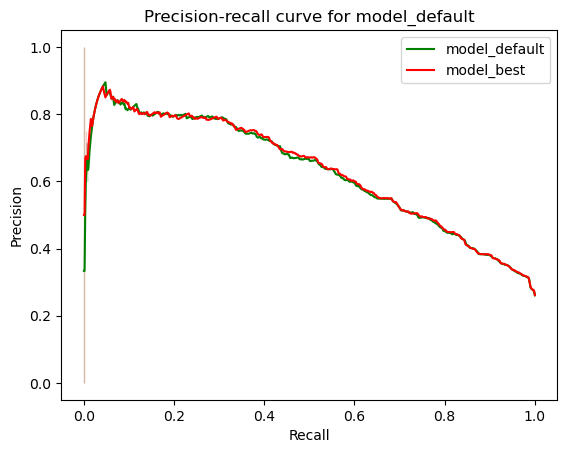

In [15]:
fig = plt.figure()

sns.lineplot(x=recall_default, y=precision_default, color='green', label='model_default')
sns.lineplot(x=recall_best, y=precision_best, color='red', label='model_best')


plt.title("Precision-recall curve for model_default")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

## Part 8. Plot ROC Curves and Compute the AUC for Both Models

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [17]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test, proba_predictions_default)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)


#### Plot ROC Curve for Default Hyperparameter:

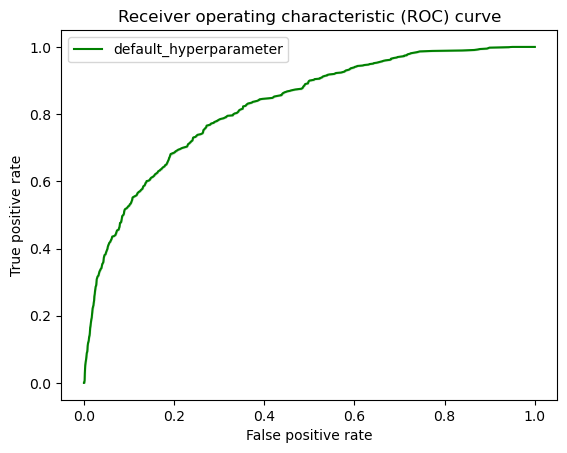

In [25]:
fig = plt.figure()

sns.lineplot(x=fpr_default, y=tpr_default, color='green', label='default_hyperparameter')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

#### Plot ROC Curve for Best Hyperparameter:

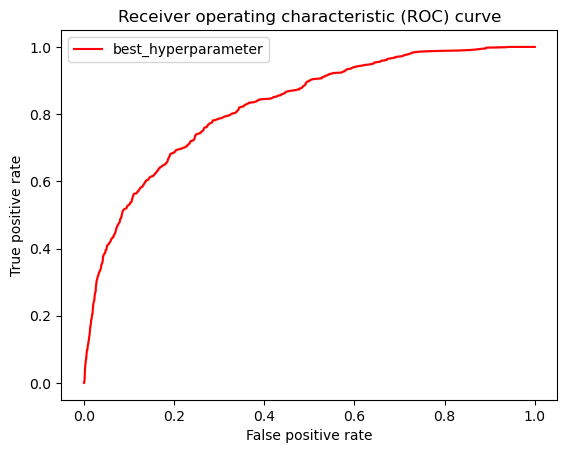

In [26]:
fig = plt.figure()

sns.lineplot(x=fpr_best, y=tpr_best, color='red', label='best_hyperparameter')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [20]:
auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)

print(auc_default)
print(auc_best)

0.822693781314471
0.8241332422366905


## Deep Dive: Feature Selection Using SelectKBest

We will extract the best 5 features from the Airbnb "listings" data set to create new training data, then fit our model with the optimal hyperparameter $C$ to the data and compute the AUC. 

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


# Note that k=5 is specifying that we want the top 5 features
selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)
filter = selector.get_support()
top_5_features = X.columns[filter]
    
print("Best 5 features:", top_5_features)
    
# Create new training and test data for features
new_X_train = X_train[top_5_features]
new_X_test = X_test[top_5_features]
    
    
# Initialize a LogisticRegression model object with the best value of hyperparameter C 
# The model object should be named 'model'
# Note: Supply max_iter=1000 as an argument when creating the model object
model = LogisticRegression(max_iter=1000, C=best_C['C'])
    
# Fit the model to the new training data
model.fit(new_X_train, y_train)
    
# Use the predict_proba() method to use your model to make predictions on the new test data 
# Save the values of the second column to a list called 'proba_predictions'
proba_predictions = model.predict_proba(new_X_test)[:,1]
    
# Compute the auc-roc
fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
auc_result = auc(fpr, tpr)
print(auc_result)


Best 5 features: Index(['host_response_rate', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_cleanliness'],
      dtype='object')
0.7971542346542346


## Part 9. Make Your Model Persistent

In [22]:
import pickle

In [23]:
pkl_model_filename = "Pickle_Airbnb_LR_Model.pkl"  

pickle.dump(model_best, open(pkl_model_filename, 'wb'))

In [24]:
persistent_model = pickle.load(open(pkl_model_filename, 'rb'))

prediction = persistent_model.predict(X_test) 
prediction

array([False, False, False, ..., False,  True, False])